### Logistic Regression

Logistic Regression is commonly used to estimate the probability that an instance belongs to a particular class.It is a classification algorithm.

Linear regression=z=b0+b1x1+b2x2+....+bnxn

sigmoid function=1/1+e^-z

Logistic regression equation=p(y=1)=1/1+e^-(b0+b1x1+b2x2+...bnxn)

In [203]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
df=pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [204]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [205]:
## describe the dataset

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Possible Ranges in general

1.Glucose:

Normal: 70 – 100 mg/dL

Life-threatening minimum: ~40 mg/dL

2.Blood Pressure (Diastolic):

Normal: 60 – 80 mmHg

Life-threatening minimum: ~40 mmHg

3.Skin Thickness:

Normal: 10 – 40 mm

Extremely low (critical): <5 mm (severe malnutrition)

4.Insulin:

Normal: 2 – 25 µU/mL

Life-threatening minimum: ~0 µU/mL (can lead to diabetic ketoacidosis if untreated)

5.BMI:

Normal: 18.5 – 24.9 kg/m²

Critical minimum: <12–13 kg/m² (high risk of death due to malnutrition)

6.Diabetes Pedigree Function (DPF):

Normal: 0.1 – 1.0



In [206]:
df.info()
print('Shape :',df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
Shape : (768, 9)


## Insights:

There are 768 rows with 9 columns.

The target column is outcome.

In [207]:
## missing value analysis and treatment

df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There are no missing values in the dataset to be handled.

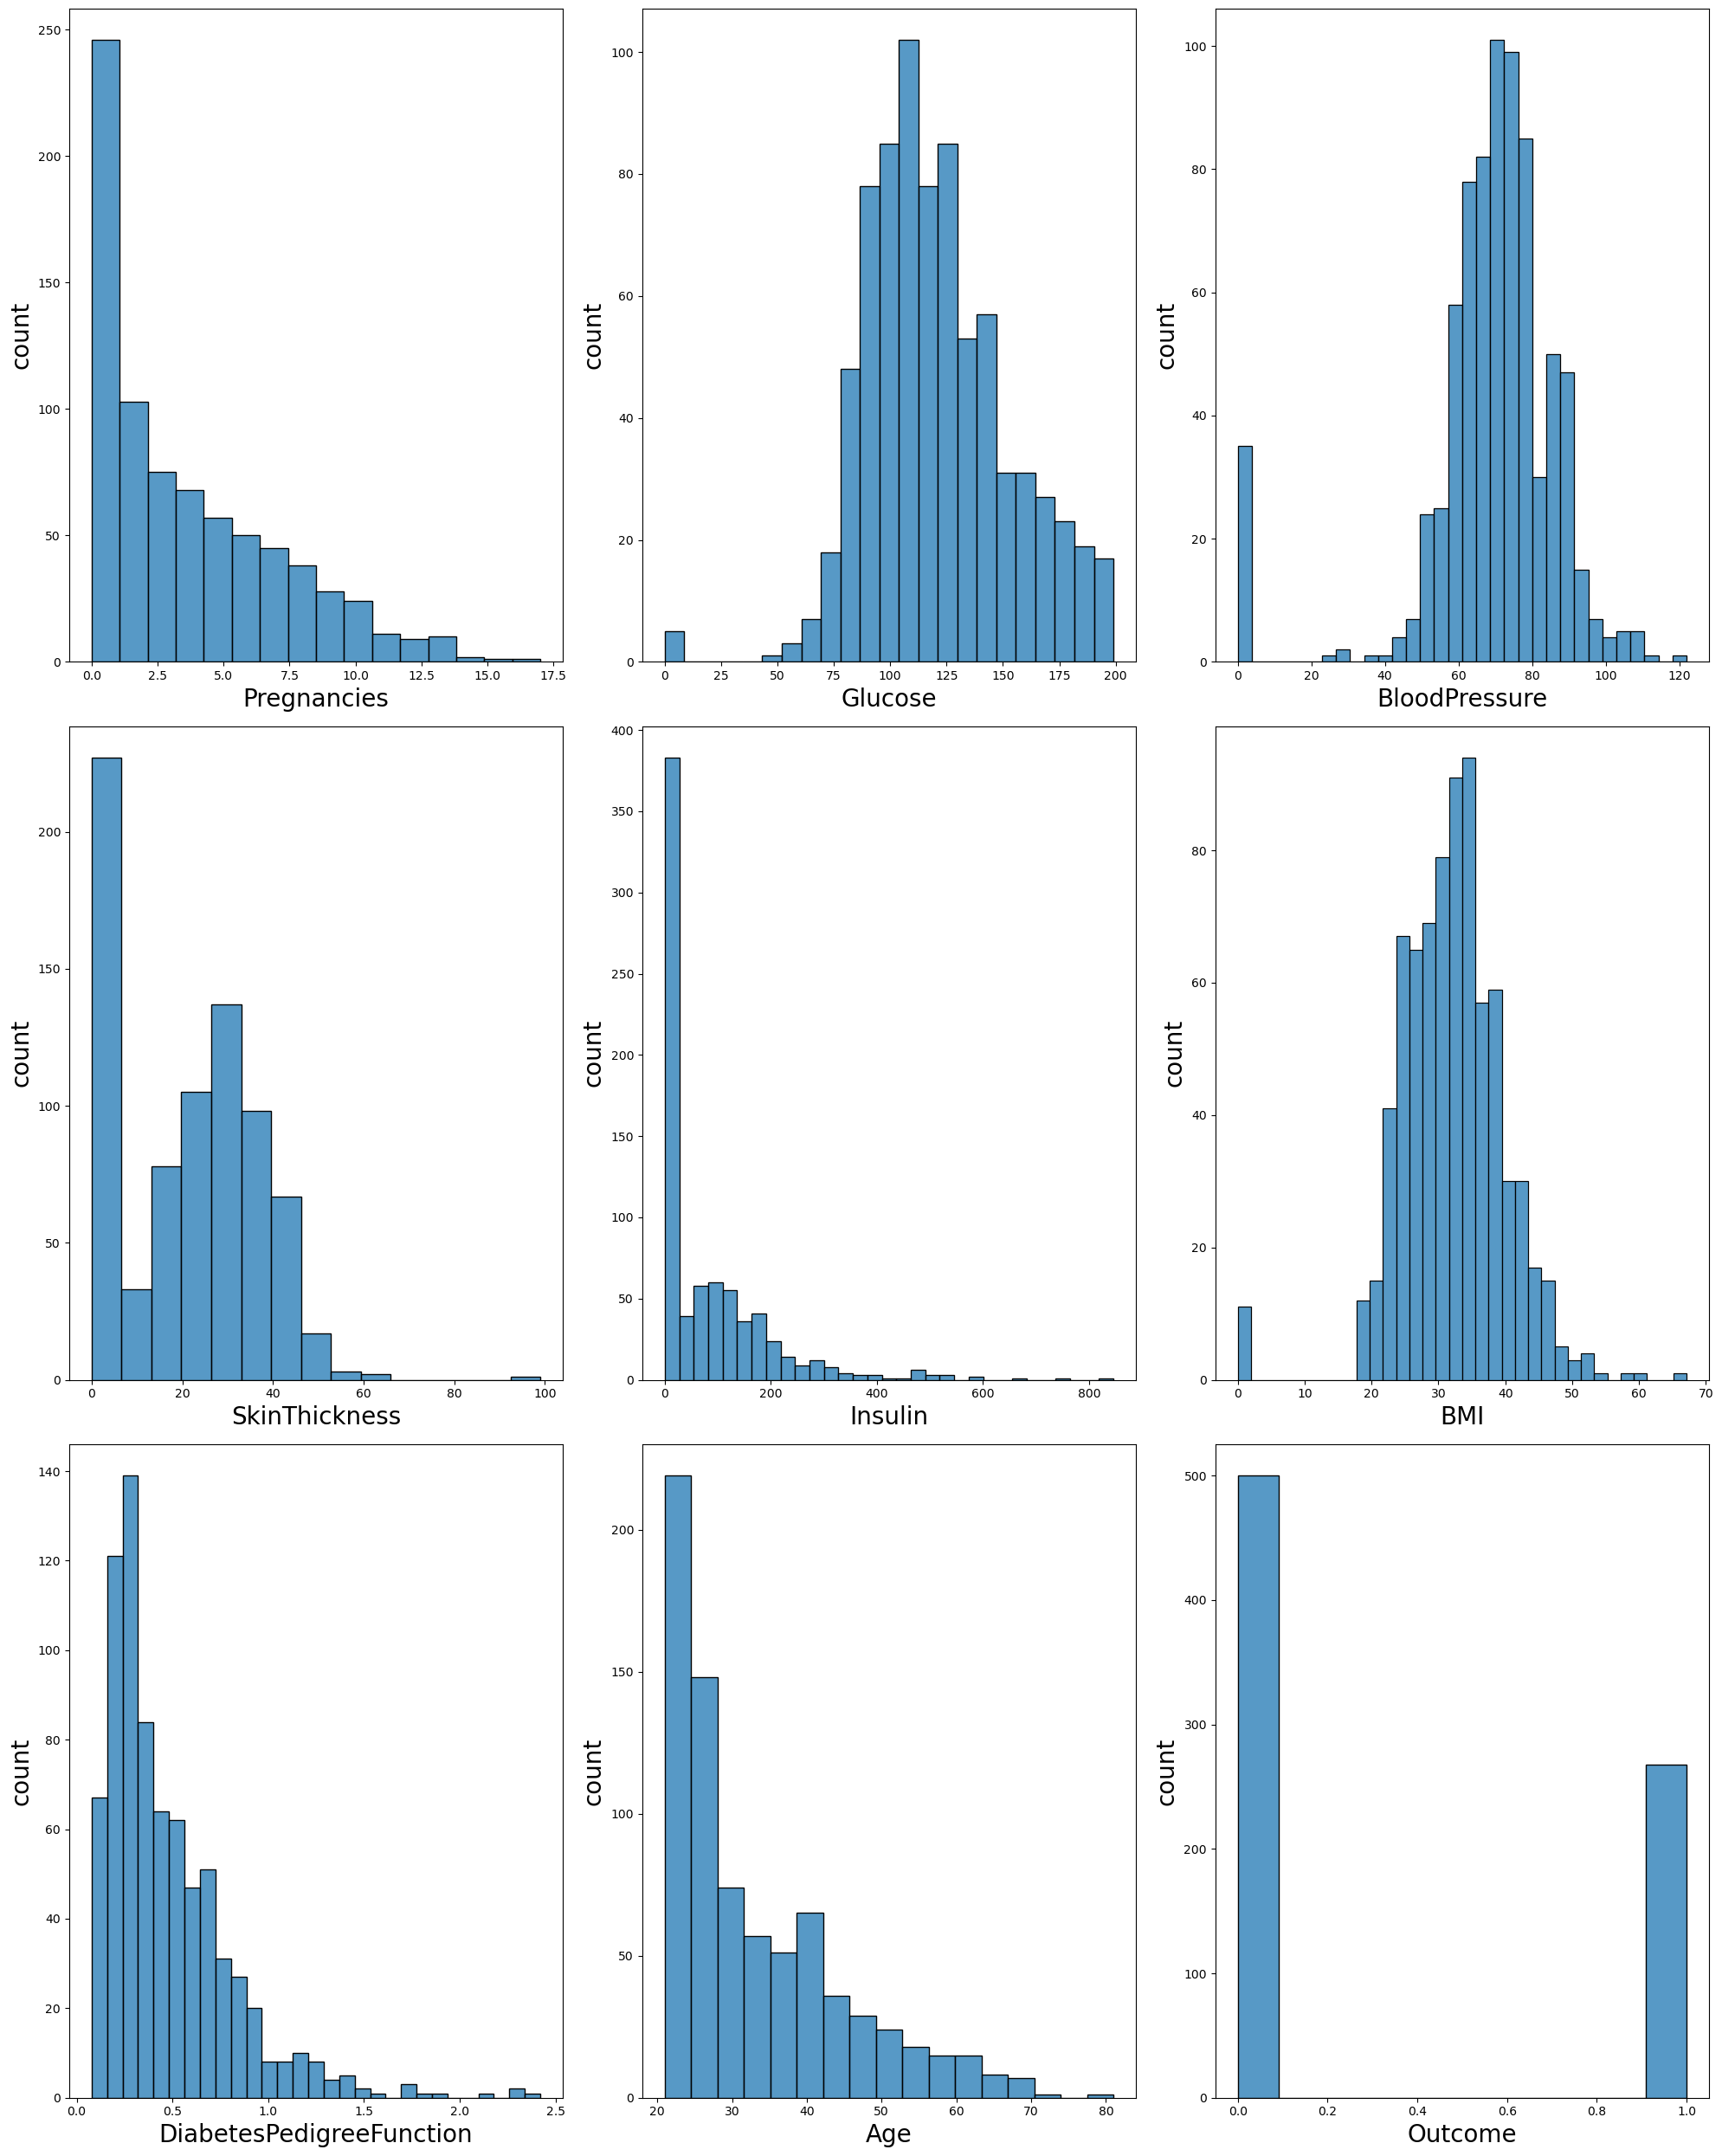

In [208]:
import seaborn as sns
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.histplot(df[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('count',fontsize=20)
    plotnumber+=1
plt.tight_layout()


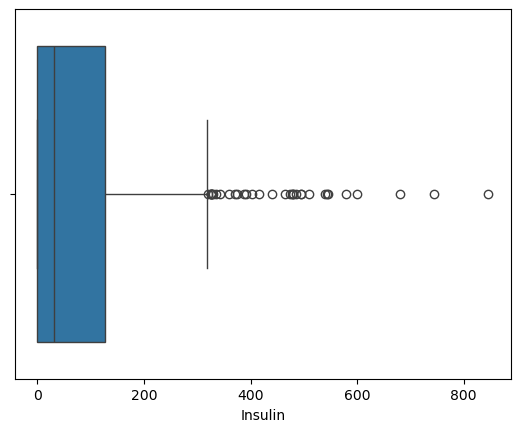

In [209]:
import seaborn as sns
sns.boxplot(x=df['Insulin'])
plt.show()

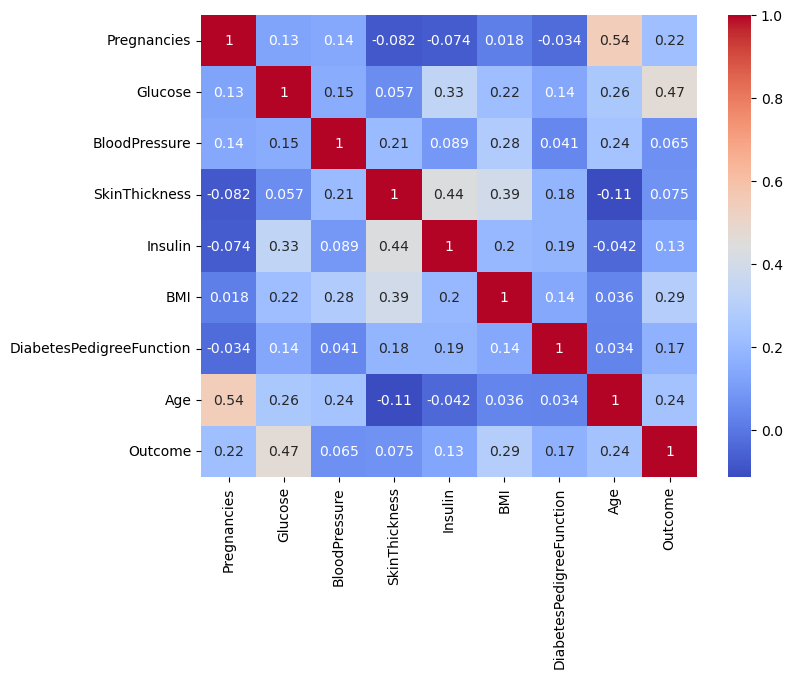

In [210]:
# correlation heatmap
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [211]:
## Analysis of Age column with outcome

df['Age'].groupby(df['Outcome']).mean()
df['Age'].groupby(df['Outcome']).std()

Outcome
0    11.667655
1    10.968254
Name: Age, dtype: float64

<Axes: xlabel='Age', ylabel='Outcome'>

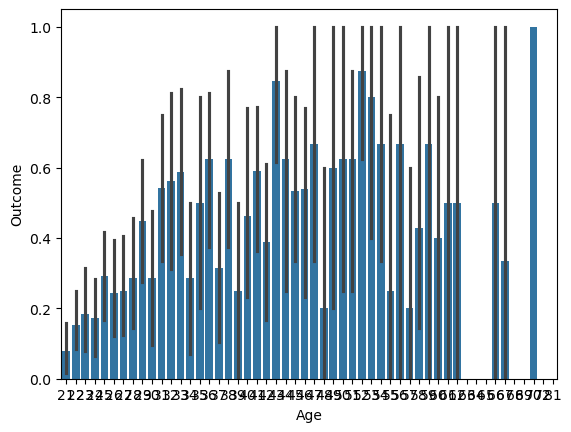

In [212]:
sns.barplot(x=df['Age'],y=df['Outcome'],estimator='mean')

<Axes: xlabel='Age'>

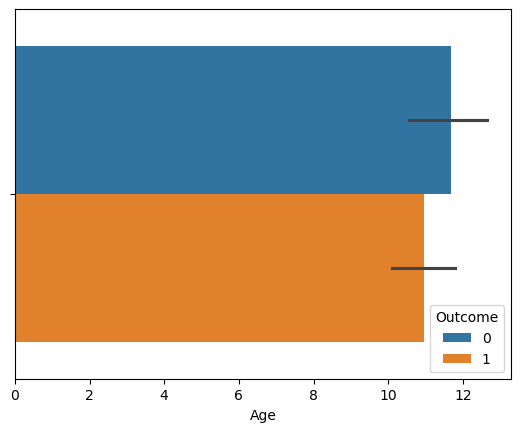

In [213]:
sns.barplot(x=df['Age'],hue=df['Outcome'],estimator='std')

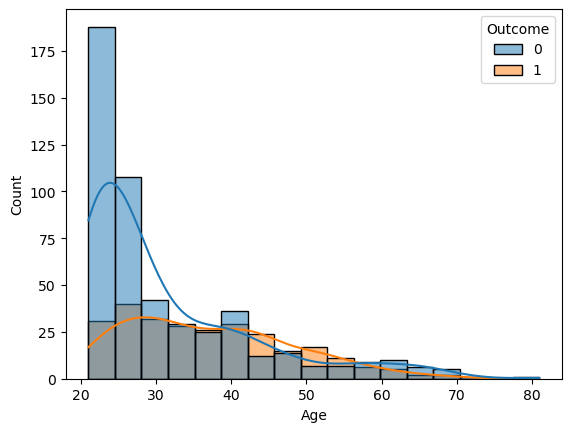

In [214]:
sns.histplot(x='Age',hue='Outcome',data=df,kde=True)
plt.show()

In [215]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

Outcome
0    30.304200
1    35.142537
Name: BMI, dtype: float64
Outcome
0    7.689855
1    7.262967
Name: BMI, dtype: float64


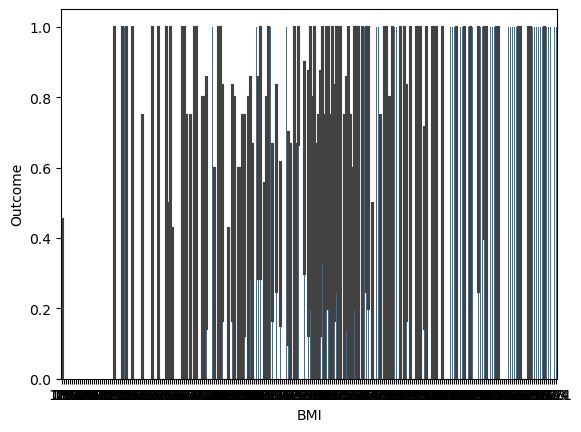

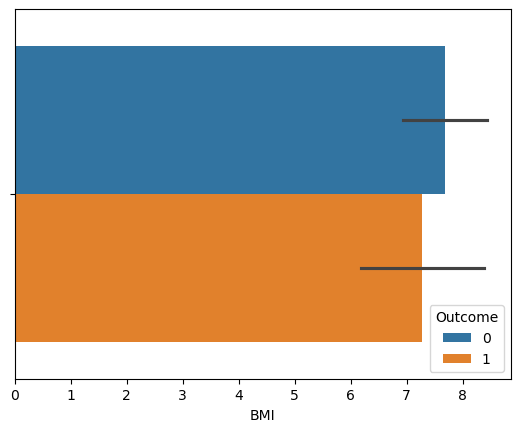

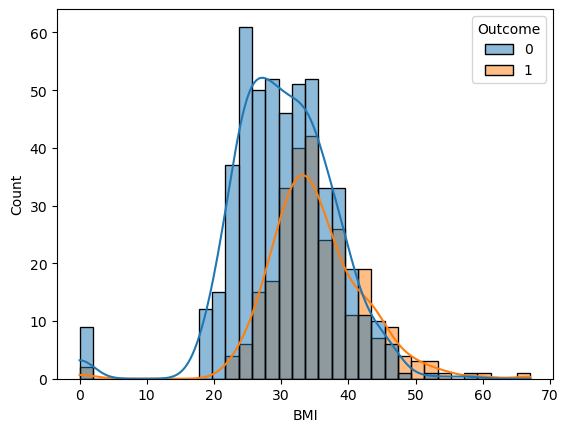

In [216]:
## Analyse BMI with outome
print(df['BMI'].groupby(df['Outcome']).mean())
print(df['BMI'].groupby(df['Outcome']).std())
sns.barplot(x=df['BMI'],y=df['Outcome'],estimator='mean')
plt.show()
sns.barplot(x=df['BMI'],hue=df['Outcome'],estimator='std')
plt.show()
sns.histplot(x='BMI',hue='Outcome',data=df,kde=True)
plt.show()


In [217]:
# Age hypothesis testing
die_age=df['Age'][df['Outcome']==1]
nondie_age=df['Age'][df['Outcome']==0]
## H0:Both data are same
## H1: Both are not same
from scipy.stats import ttest_ind
stat,p=ttest_ind(die_age,nondie_age)
alpha=0.05 ## Significance 
if p<alpha:
    print('Reject H0')
else:
    print('Accept H0')

Reject H0


We reject H0 because there is significant difference in distribution of age of diabetic and non diabetic . The Age column has effect on outcome column.

In [218]:
## BMI Hypothesis testing

die_bmi=df['BMI'][df['Outcome']==1]
nondie_bmi=df['BMI'][df['Outcome']==0]
## H0:Both data are same
## H1: Both are not same
from scipy.stats import ttest_ind
stat,p=ttest_ind(die_bmi,nondie_bmi)
alpha=0.05 ## Significance 
if p<alpha:
    print('Reject H0')
else:
    print('Accept H0')

Reject H0


We reject H0 because there is significant difference in distribution of bmi of diabetic and non diabetic .The BMI column has effect on outcome column.

Outcome
0     68.792000
1    100.335821
Name: Insulin, dtype: float64
Outcome
0     98.865289
1    138.689125
Name: Insulin, dtype: float64


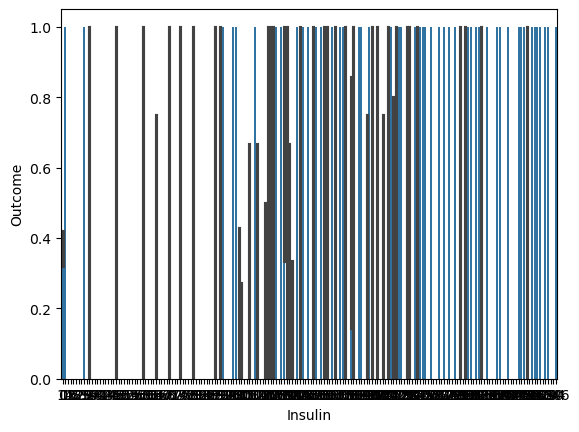

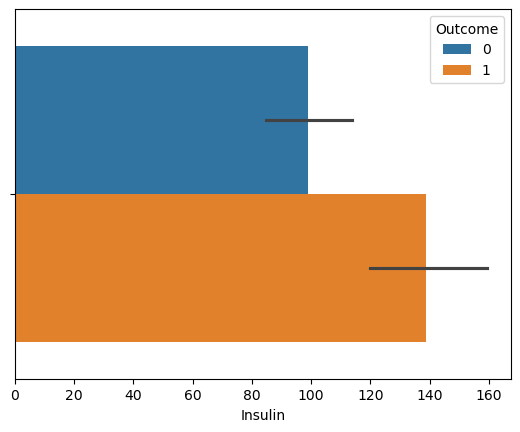

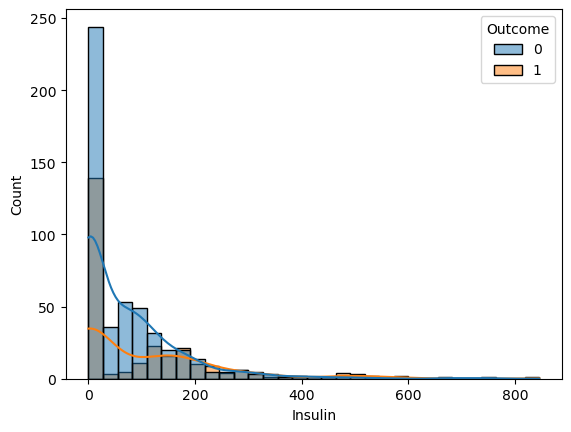

Reject H0


In [219]:
## Analyse Insulin with outome
print(df['Insulin'].groupby(df['Outcome']).mean())
print(df['Insulin'].groupby(df['Outcome']).std())
sns.barplot(x=df['Insulin'],y=df['Outcome'],estimator='mean')
plt.show()
sns.barplot(x=df['Insulin'],hue=df['Outcome'],estimator='std')
plt.show()
sns.histplot(x='Insulin',hue='Outcome',data=df,kde=True)
plt.show()
## Insulin Hypothesis testing

die_ins=df['Insulin'][df['Outcome']==1]
nondie_ins=df['Insulin'][df['Outcome']==0]
## H0:Both data are same
## H1: Both are not same
from scipy.stats import ttest_ind
stat,p=ttest_ind(die_ins,nondie_ins)
alpha=0.05 ## Significance 
if p<alpha:
    print('Reject H0')
else:
    print('Accept H0')

We reject H0 because there is significant difference in distribution of insulin of diabetic and non diabetic . The Insulin column has effect on outcome column.

Outcome
0    109.980000
1    141.257463
Name: Glucose, dtype: float64
Outcome
0    26.141200
1    31.939622
Name: Glucose, dtype: float64


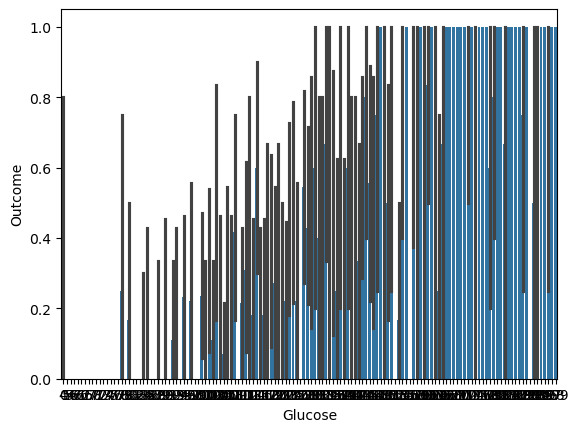

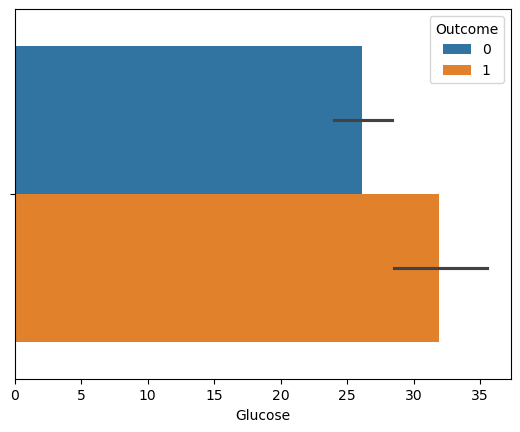

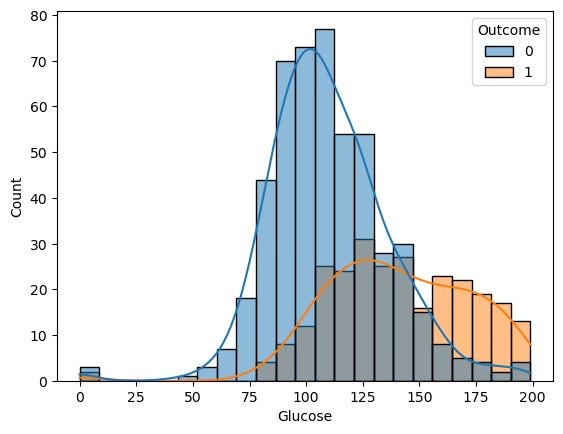

Reject H0


In [220]:
## Analyse Glucose with outome
print(df['Glucose'].groupby(df['Outcome']).mean())
print(df['Glucose'].groupby(df['Outcome']).std())
sns.barplot(x=df['Glucose'],y=df['Outcome'],estimator='mean')
plt.show()
sns.barplot(x=df['Glucose'],hue=df['Outcome'],estimator='std')
plt.show()
sns.histplot(x='Glucose',hue='Outcome',data=df,kde=True)
plt.show()
## Glucose Hypothesis testing

die_glu=df['Glucose'][df['Outcome']==1]
nondie_glu=df['Glucose'][df['Outcome']==0]
## H0:Both data are same
## H1: Both are not same
from scipy.stats import ttest_ind
stat,p=ttest_ind(die_glu,nondie_glu)
alpha=0.05 ## Significance 
if p<alpha:
    print('Reject H0')
else:
    print('Accept H0')

We reject H0 because there is significant difference in distribution of glucose of diabetic and non diabetic .The Glucose has effect on outcome column.

Outcome
0    68.184000
1    70.824627
Name: BloodPressure, dtype: float64
Outcome
0    18.063075
1    21.491812
Name: BloodPressure, dtype: float64


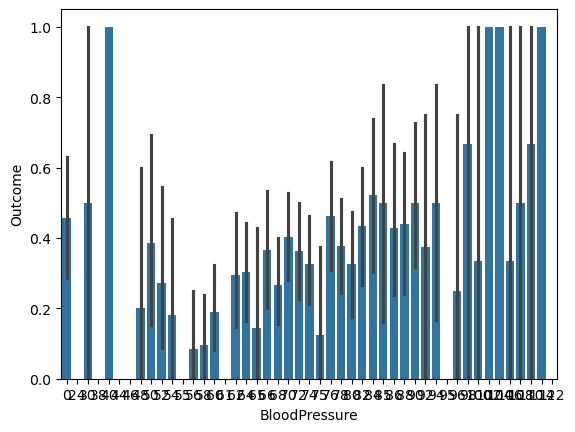

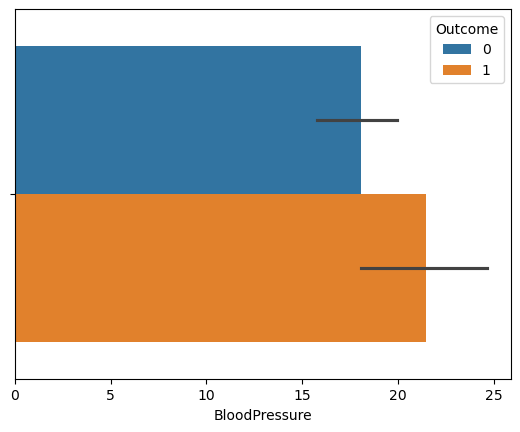

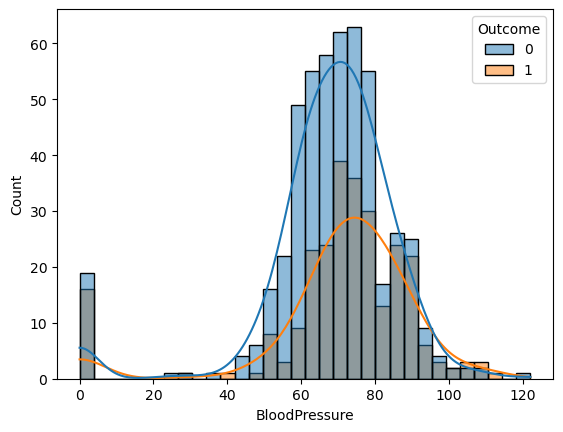

Accept H0


In [221]:
## BloodPressure Hypothesis testing

print(df['BloodPressure'].groupby(df['Outcome']).mean())
print(df['BloodPressure'].groupby(df['Outcome']).std())
sns.barplot(x=df['BloodPressure'],y=df['Outcome'],estimator='mean')
plt.show()
sns.barplot(x=df['BloodPressure'],hue=df['Outcome'],estimator='std')
plt.show()
sns.histplot(x='BloodPressure',hue='Outcome',data=df,kde=True)
plt.show()

die_blp=df['BloodPressure'][df['Outcome']==1]
nondie_blp=df['BloodPressure'][df['Outcome']==0]
## H0:Both data are same
## H1: Both are not same
from scipy.stats import ttest_ind
stat,p=ttest_ind(die_blp,nondie_blp)
alpha=0.05 ## Significance 
if p<alpha:
    print('Reject H0')
else:
    print('Accept H0')

We accept H0 because there is no significant difference in distribution of bloodpressure of diabetic and non diabetic . BloodPressure does not have any effect on the outcome .

In [222]:
outlier_count = {}
num_cols = df.select_dtypes(include='number').columns
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    count = ((df[col] < lower) | (df[col] > upper)).sum()
    outlier_count[col] = count

outlier_df = pd.DataFrame(
    outlier_count.items(),
    columns=['Column', 'Outlier_Count']
)

outlier_df



,Column,Outlier_Count
0,Pregnancies,4
1,Glucose,5
2,BloodPressure,45
3,SkinThickness,1
4,Insulin,34
5,BMI,19
6,DiabetesPedigreeFunction,29
7,Age,9
8,Outcome,0


In [223]:
total_rows = df.shape[0]

outlier_df['Data_Loss_%'] = (outlier_df['Outlier_Count'] / total_rows) * 100

outlier_df


,Column,Outlier_Count,Data_Loss_%
0,Pregnancies,4,0.520833
1,Glucose,5,0.651042
2,BloodPressure,45,5.859375
3,SkinThickness,1,0.130208
4,Insulin,34,4.427083
5,BMI,19,2.473958
6,DiabetesPedigreeFunction,29,3.776042
7,Age,9,1.171875
8,Outcome,0,0.000000


In [224]:
## Handling outliers

df= df.copy()
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df[col] = df[col].clip(lower, upper)


In [ ]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

from sklearn.metrics import accuracy_score

print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))


Train Accuracy: 0.7839851024208566
Test Accuracy: 0.7316017316017316


In [228]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train,y_train_pred)

array([[318,  32],
       [ 84, 103]])

In [229]:
confusion_matrix(y_test,y_test_pred)

array([[132,  18],
       [ 44,  37]])